## Importing Libraries and Dataframe

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import operator
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn import metrics
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report

In [5]:
# path variable 
path = r'C:\Users\jmiel\JENNY_STUFF\MY_DOCS\CareerFoundry\ClimateWins'

# Upload pkl DataSet_scaled file
df = pd.read_csv(os.path.join(path, 'Data Sets', 'Dataset-weather-prediction-dataset-processed.csv'))
df

,DATE,MONTH,BASEL_cloud_cover,BASEL_wind_speed,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_snow_depth,BASEL_sunshine,...,VALENTIA_cloud_cover,VALENTIA_humidity,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_snow_depth,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max
0,19600101,1,7,2.1,0.85,1.0180,0.32,0.09,0,0.7,...,5,0.88,1.0003,0.45,0.34,0,4.7,8.5,6.0,10.9
1,19600102,1,6,2.1,0.84,1.0180,0.36,1.05,0,1.1,...,7,0.91,1.0007,0.25,0.84,0,0.7,8.9,5.6,12.1
2,19600103,1,8,2.1,0.90,1.0180,0.18,0.30,0,0.0,...,7,0.91,1.0096,0.17,0.08,0,0.1,10.5,8.1,12.9
3,19600104,1,3,2.1,0.92,1.0180,0.58,0.00,0,4.1,...,7,0.86,1.0184,0.13,0.98,0,0.0,7.4,7.3,10.6
4,19600105,1,6,2.1,0.95,1.0180,0.65,0.14,0,5.4,...,3,0.80,1.0328,0.46,0.00,0,5.7,5.7,3.0,8.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22945,20221027,10,1,2.1,0.79,1.0248,1.34,0.22,0,7.7,...,5,0.82,1.0142,1.13,0.41,0,3.4,10.7,7.9,13.5
22946,20221028,10,6,2.1,0.77,1.0244,1.34,0.22,0,5.4,...,5,0.82,1.0142,1.13,0.41,0,3.4,10.7,7.9,13.5
22947,20221029,10,4,2.1,0.76,1.0227,1.34,0.22,0,6.1,...,5,0.82,1.0142,1.13,0.41,0,3.4,10.7,7.9,13.5
22948,20221030,10,5,2.1,0.80,1.0212,1.34,0.22,0,5.8,...,5,0.82,1.0142,1.13,0.41,0,3.4,10.7,7.9,13.5


In [6]:
# Import Pleasant Weather Dataframe 
pleasant_weather = pd.read_csv(os.path.join(path, 'Data Sets', 'Dataset-Answers-Weather_Prediction_Pleasant_Weather.csv'))
pleasant_weather

,DATE,BASEL_pleasant_weather,BELGRADE_pleasant_weather,BUDAPEST_pleasant_weather,DEBILT_pleasant_weather,DUSSELDORF_pleasant_weather,HEATHROW_pleasant_weather,KASSEL_pleasant_weather,LJUBLJANA_pleasant_weather,MAASTRICHT_pleasant_weather,MADRID_pleasant_weather,MUNCHENB_pleasant_weather,OSLO_pleasant_weather,SONNBLICK_pleasant_weather,STOCKHOLM_pleasant_weather,VALENTIA_pleasant_weather
0,19600101,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,19600102,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,19600103,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,19600104,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,19600105,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22945,20221027,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
22946,20221028,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
22947,20221029,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
22948,20221030,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [7]:
#keep necessary temperature data 
#using the suffixes from the temp sets
df_filtered = df[['DATE']].join(df.filter(regex='temp_(mean|min|max)$'))

In [8]:
#Dropping Roma, Tours, Gdansk as they are not in pleasant data set 
df_filtered = df_filtered.loc[:, ~df_filtered.columns.str.startswith('ROMA')]
df_filtered = df_filtered.loc[:, ~df_filtered.columns.str.startswith('TOURS')]
df_filtered = df_filtered.loc[:, ~df_filtered.columns.str.startswith('GDANSK')]

In [9]:
#Create an 'X' matrix by dropping the unneeded columns.
X = df_filtered.drop(['DATE'], axis=1)
y = pleasant_weather.drop(['DATE'], axis=1)

In [10]:
print(X.shape)
print(y.shape)

(22950, 45)
(22950, 15)


In [11]:
#Split data into training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=37)

In [12]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(17212, 45)
(5738, 45)
(17212, 15)
(5738, 15)


In [13]:
#Scaling the data
scaler = StandardScaler()

#Fit the train data
scaler.fit(X_train)

#Scaling the X data
X_train_sc = scaler.transform(X_train)
X_test_sc = scaler.transform(X_test)

print(X_train_sc[:10])

[[-1.87403333e-01  1.52274455e-02 -5.68011991e-01 -1.64623819e-01
  -2.85911246e-01 -1.80794749e-01 -4.39182607e-01 -2.35427562e-01
  -6.45796598e-01 -3.65416362e-01 -1.16276687e-01 -5.58799705e-01
  -4.28247873e-01 -1.97085955e-01 -5.21922946e-01 -5.42911319e-01
  -9.50882575e-02 -9.93839218e-01 -4.49097626e-01 -6.86283868e-01
  -5.92256144e-01  1.69723834e-01  4.69992035e-01 -2.19018232e-01
  -2.60277510e-01 -1.16070689e-01 -3.85730583e-01 -7.46789845e-01
  -5.68138515e-01 -8.60242946e-01  1.10728492e-02  2.98634758e-01
  -1.85799320e-01 -6.47208841e-01 -3.40753526e-01 -9.39936679e-01
   1.83954189e-01  3.74726241e-01 -3.47199892e-03 -4.18123050e-01
  -2.92056092e-01 -6.41191129e-01 -6.51180255e-03 -6.51735787e-05
  -4.05345279e-03]
 [-9.20759627e-01 -1.11825479e+00 -8.31470750e-01 -1.24305539e+00
  -1.29702249e+00 -1.15804036e+00 -1.07444997e+00 -1.23875017e+00
  -9.42281690e-01 -2.38804992e-01 -4.61462760e-01 -5.03946245e-01
  -3.84030172e-01 -8.13370953e-01 -6.35520247e-01 -1.2291

In [14]:
#Assign the scaled data to DataFrames
X_train_df = pd.DataFrame(X_train_sc, index=X_train.index, columns=X_train.columns)
X_test_df = pd.DataFrame(X_test_sc, index=X_test.index, columns=X_test.columns)

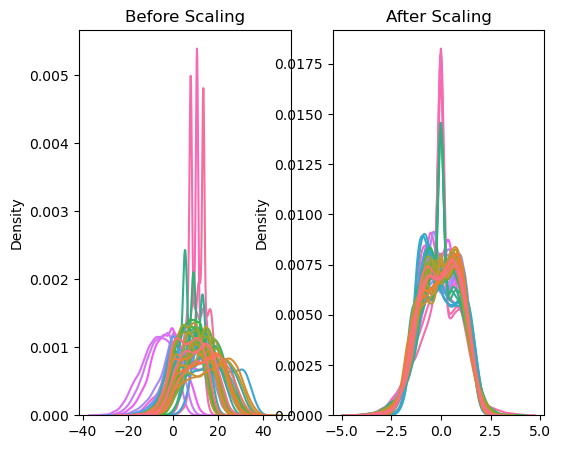

In [15]:
#Show scaling differences 
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(6, 5))

ax1.set_title('Before Scaling')
sns.kdeplot(X_train, ax=ax1)
ax1.get_legend().remove()

ax2.set_title('After Scaling')
sns.kdeplot(X_train_sc, ax=ax2)
ax2.get_legend().remove()

plt.show()

In [16]:
#Create the ANN Model 1
#hidden_layer_sizes has up to three layers, each with a number of nodes. So (5, 5) is two hidden layers with 5 nodes each,
#and (100, 50, 25) is three hidden layers with 100, 50, and 25 nodes. 
mlp = MLPClassifier(hidden_layer_sizes=(5, 5), max_iter=500, tol=0.0001)
#Fit the data to the model
mlp.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(5, 5), max_iter=500)

In [17]:
y_pred = mlp.predict(X_train)
print(accuracy_score(y_pred, y_train))
y_pred_test = mlp.predict(X_test)
print(accuracy_score(y_pred_test, y_test))

0.4549732744596793
0.45869640989891947


#### ANN model 1 has a accuracy of 45.6% for the training model and 46.2% for the test 

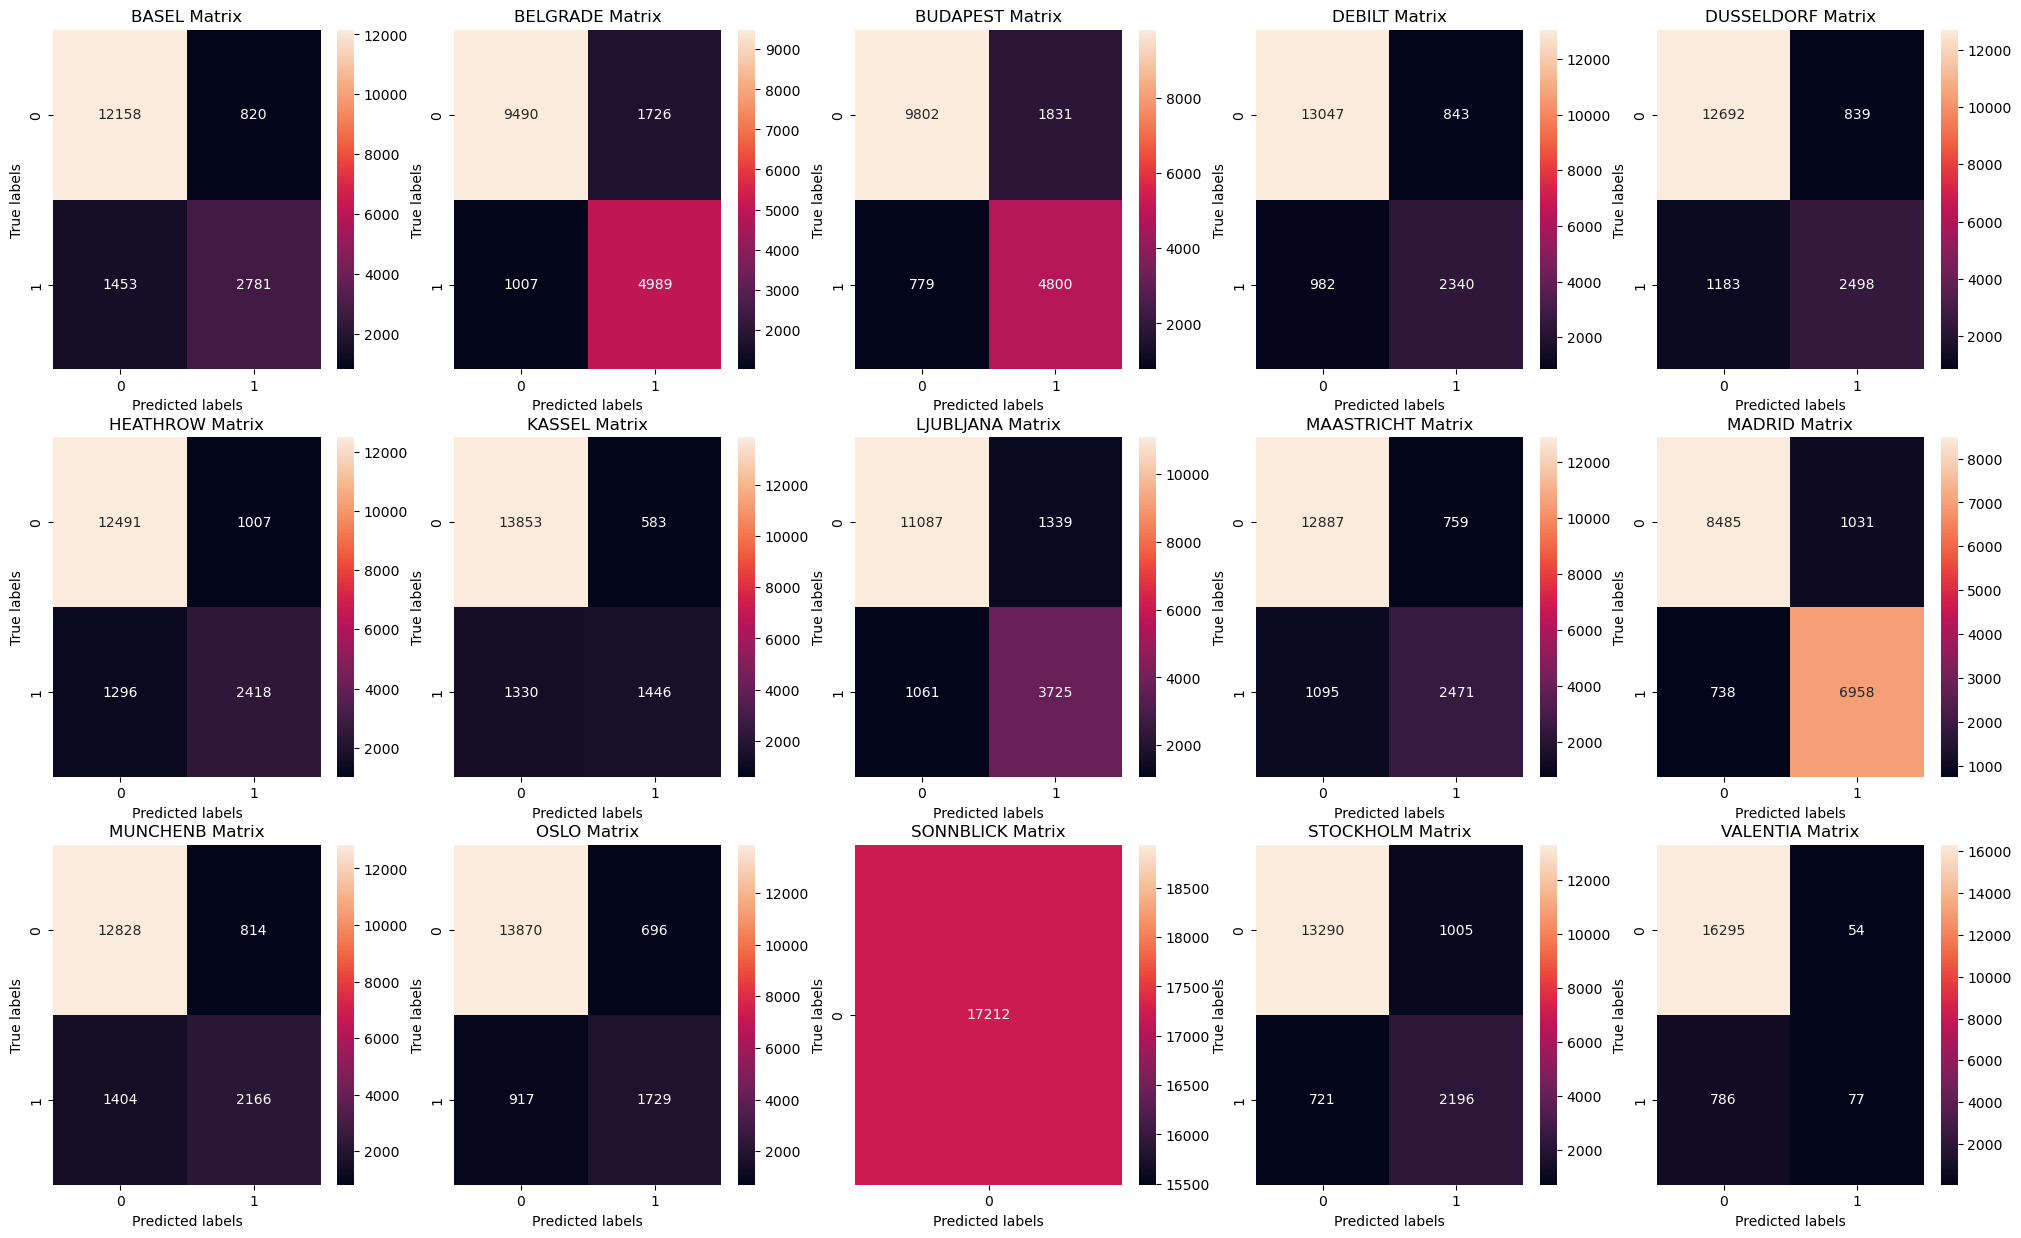

In [19]:
#Confusion matrix  (Training data model 1)
locations = list({x.split("_")[0] for x in df_filtered.columns if x not in ["MONTH", "DATE"]})
locations.sort()
locations
key = "_pleasant_weather"
stations = []
figure, ax = plt.subplots(3, 5, figsize=(25,15))
labels = ['pleasant', 'unpleasant']   
count=0
for i in range(3):
    for j in range(5):
        name = locations[count]
        cm = confusion_matrix(y_train.loc[:,name+key], y_pred[:,count])
        disp = ConfusionMatrixDisplay(confusion_matrix=cm)
        ax[i,j] = sns.heatmap(cm, annot=True, fmt='g', ax=ax[i,j]);
        # labels, title and ticks
        ax[i,j].set_xlabel('Predicted labels');
        ax[i,j].set_ylabel('True labels'); 
        ax[i,j].set_title(name +' Matrix'); 
        #ax[i,j].xaxis.set_ticklabels(labels); #These two lines may throw an error depending on SONNBLICK data. Can you tell why?
        #ax[i,j].yaxis.set_ticklabels(labels);
        count+=1

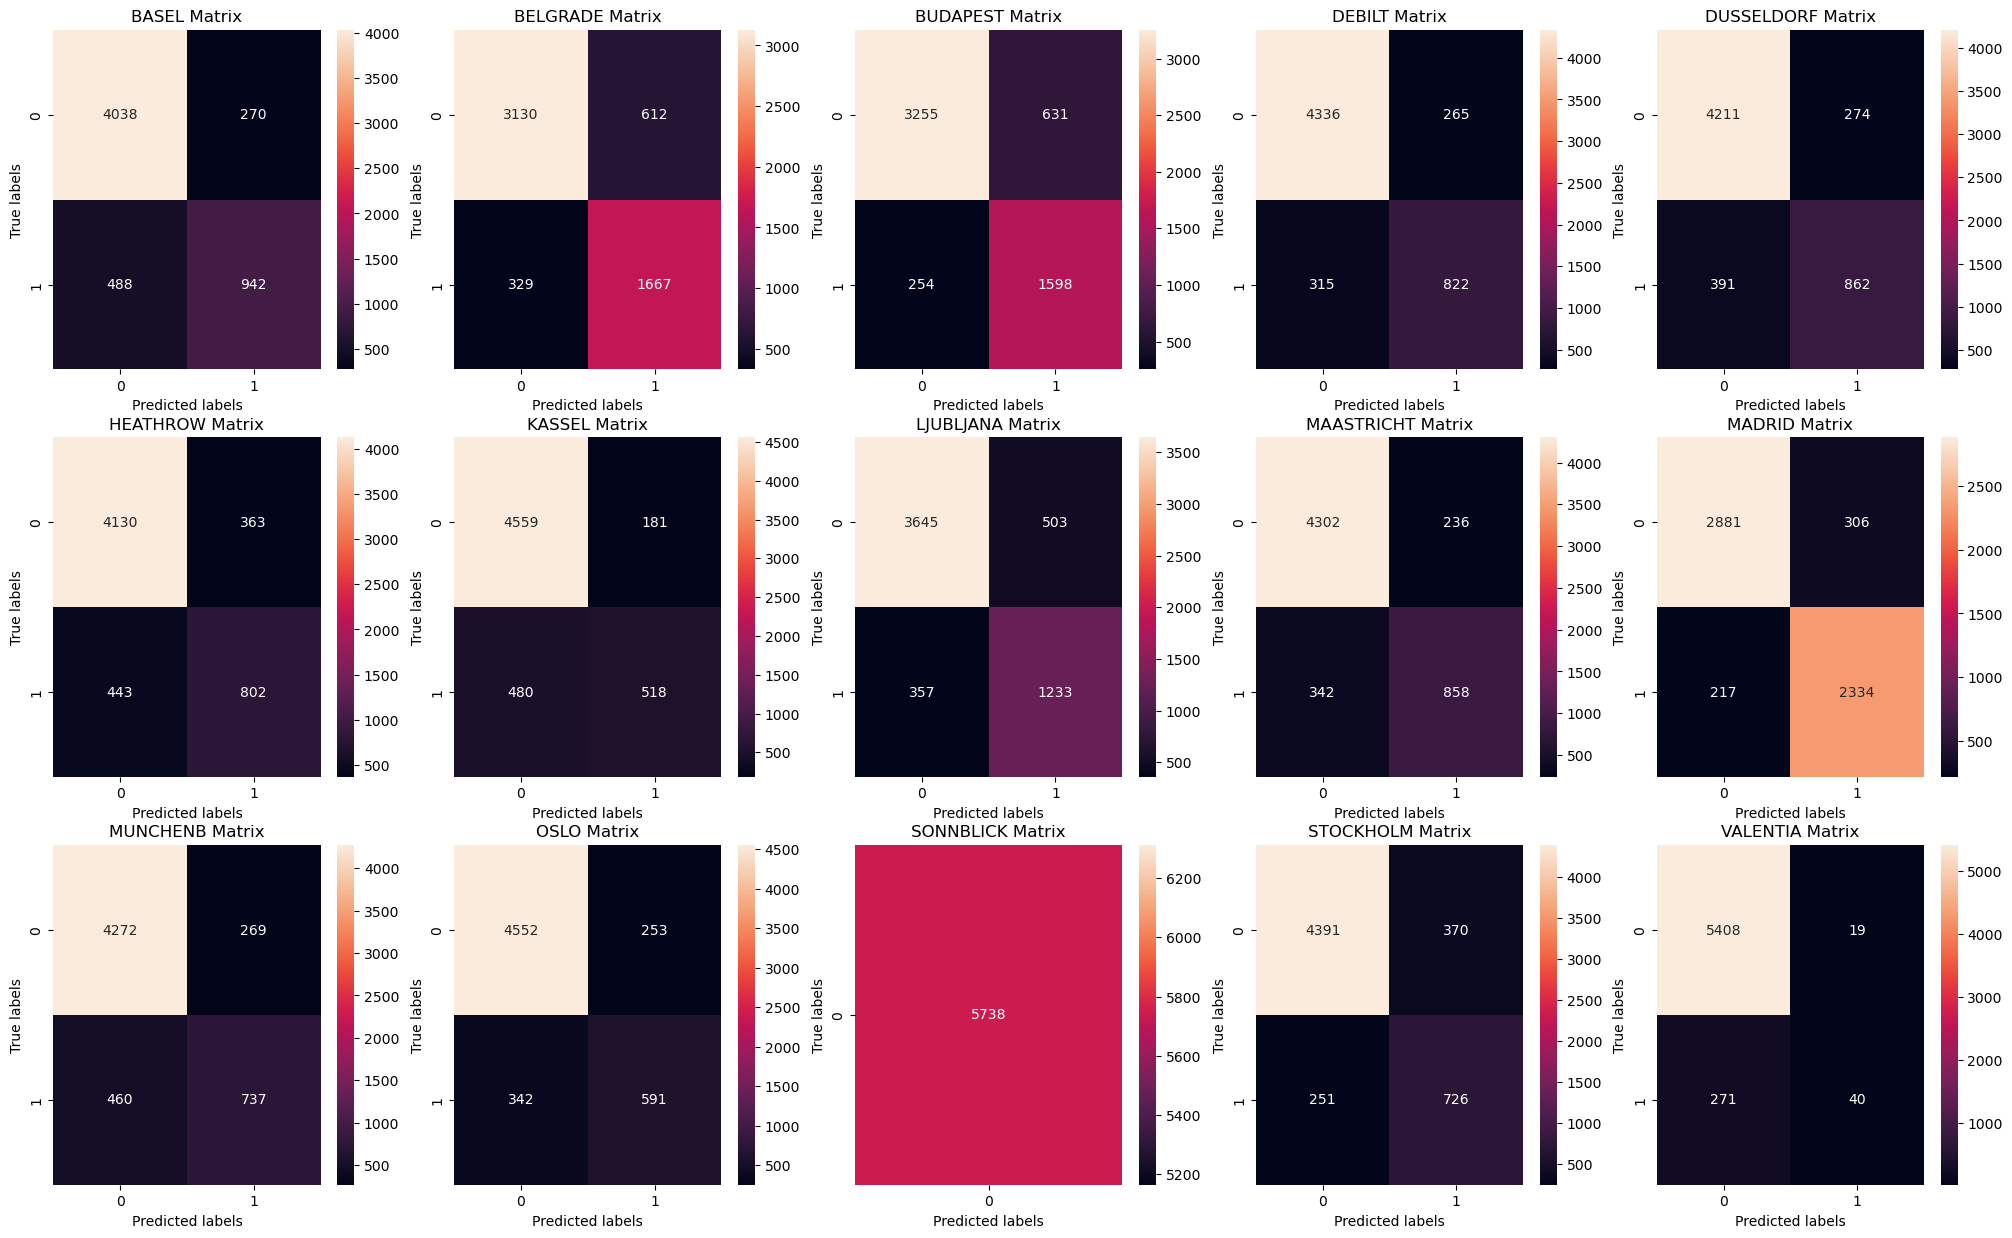

In [20]:
#Confusion matrix  (Testing data model 1)
locations = list({x.split("_")[0] for x in df_filtered.columns if x not in ["MONTH", "DATE"]})
locations.sort()
locations
key = "_pleasant_weather"
stations = []
figure, ax = plt.subplots(3, 5, figsize=(25,15))
labels = ['pleasant', 'unpleasant']   
count=0
for i in range(3):
    for j in range(5):
        name = locations[count]
        cm = confusion_matrix(y_test.loc[:,name+key], y_pred_test[:,count])
        disp = ConfusionMatrixDisplay(confusion_matrix=cm)
        ax[i,j] = sns.heatmap(cm, annot=True, fmt='g', ax=ax[i,j]);
        # labels, title and ticks
        ax[i,j].set_xlabel('Predicted labels');
        ax[i,j].set_ylabel('True labels'); 
        ax[i,j].set_title(name +' Matrix'); 
        #ax[i,j].xaxis.set_ticklabels(labels); #These two lines may throw an error depending on SONNBLICK data. Can you tell why?
        #ax[i,j].yaxis.set_ticklabels(labels);
        count+=1

In [21]:
#Create the ANN Model 2
#hidden_layer_sizes has up to three layers, each with a number of nodes. So (5, 5) is two hidden layers with 5 nodes each,
#and (100, 50, 25) is three hidden layers with 100, 50, and 25 nodes.
mlp = MLPClassifier(hidden_layer_sizes=(550, 350, 150), max_iter=5000, tol=0.0001)
 #Fit the data to the model
mlp.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(550, 350, 150), max_iter=5000)

In [22]:
y_pred = mlp.predict(X_train)
print(accuracy_score(y_pred, y_train))
y_pred_test = mlp.predict(X_test)
print(accuracy_score(y_pred_test, y_test))

0.7855565884266791
0.4607877309166957


#### ANN Model 2 has an accuracy rate of 72.9% for the training model and 45% for the test model

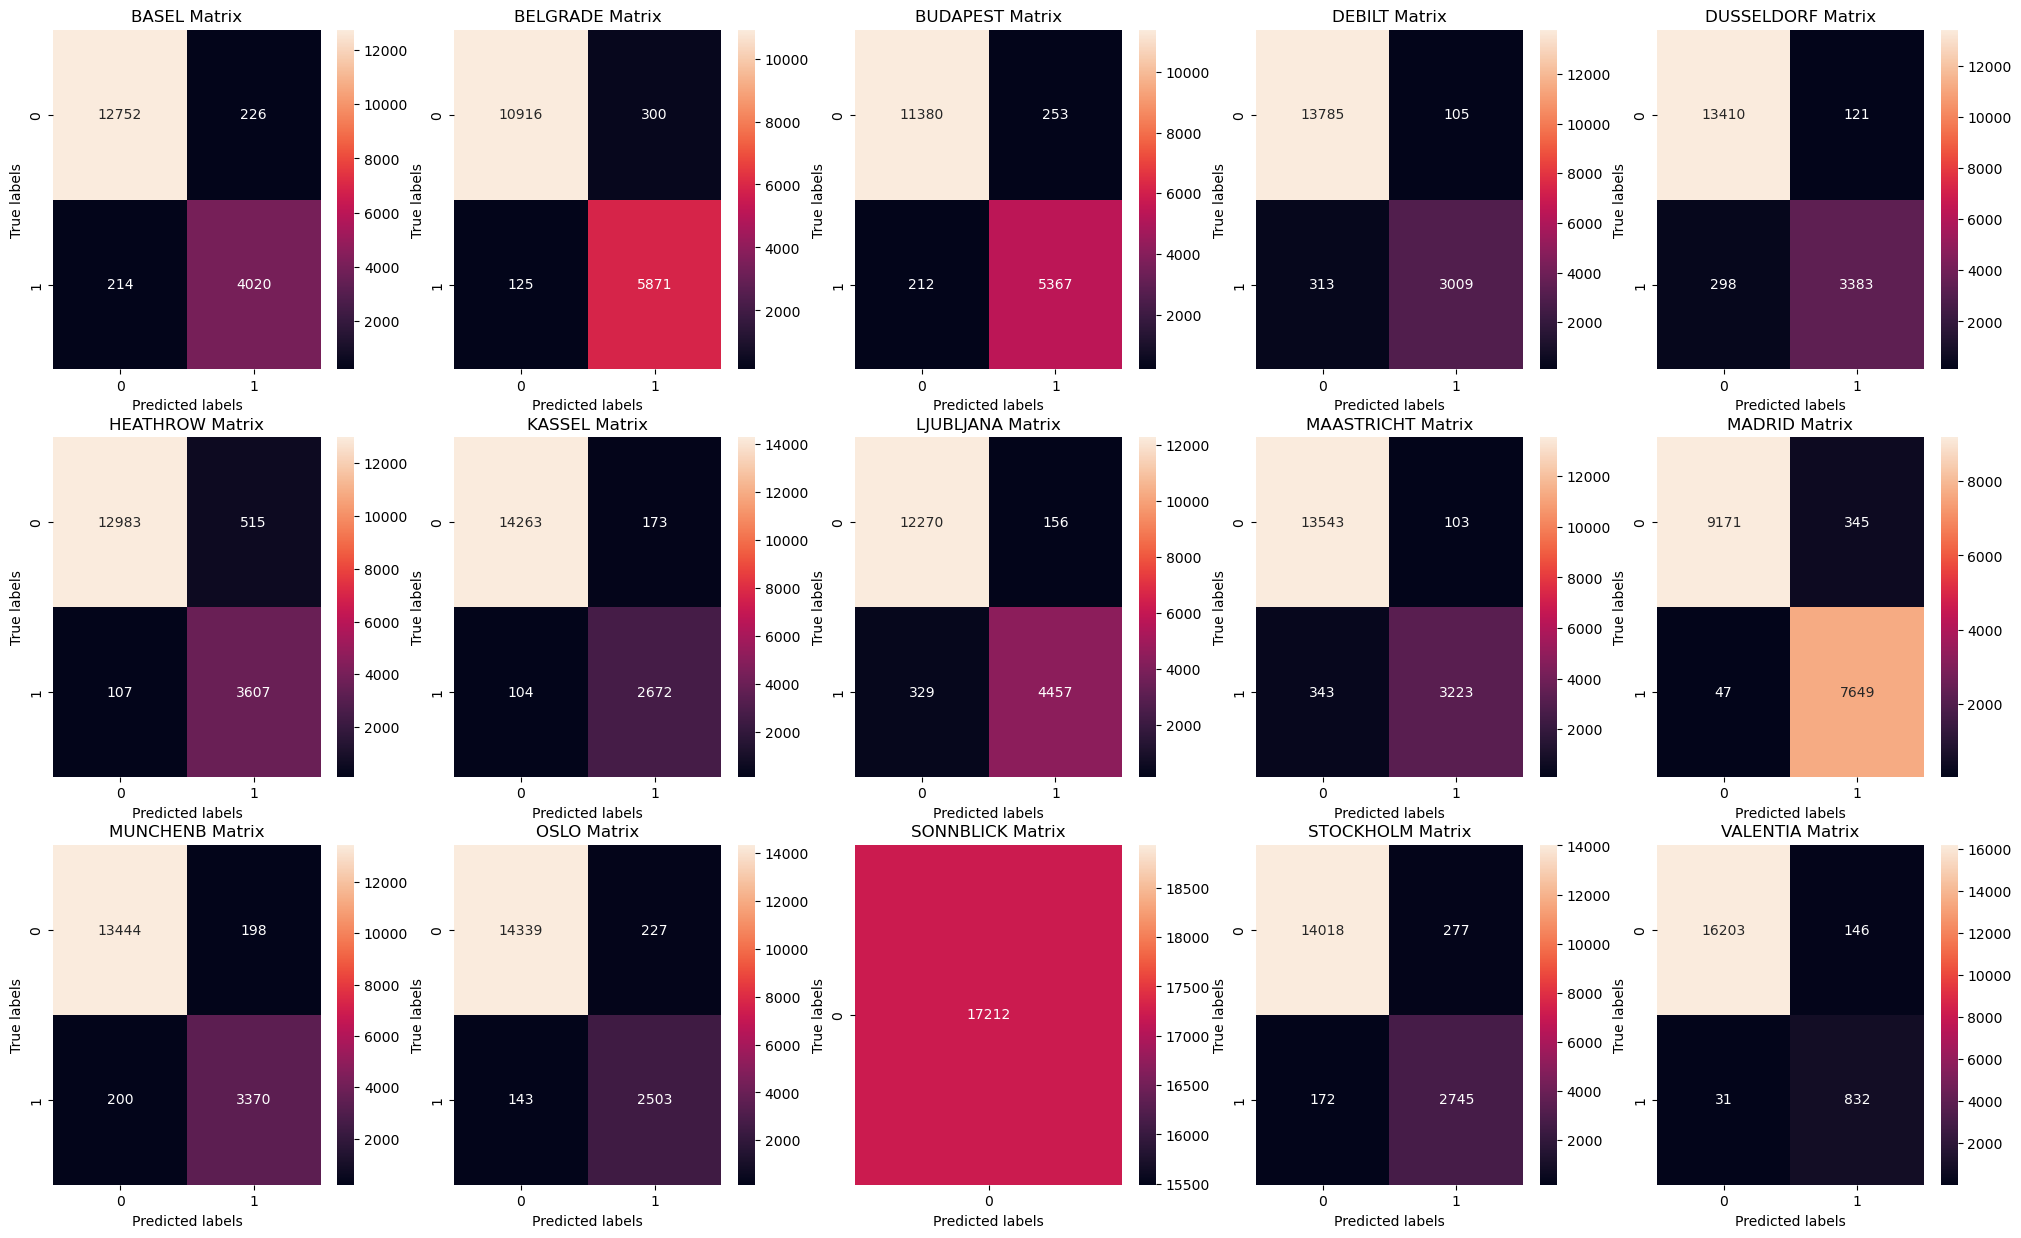

In [24]:
#Confusion matrix  (Training data model 2)
locations = list({x.split("_")[0] for x in df_filtered.columns if x not in ["MONTH", "DATE"]})
locations.sort()
locations
key = "_pleasant_weather"
stations = []
figure, ax = plt.subplots(3, 5, figsize=(25,15))
labels = ['pleasant', 'unpleasant']   
count=0
for i in range(3):
    for j in range(5):
        name = locations[count]
        cm = confusion_matrix(y_train.loc[:,name+key], y_pred[:,count])
        disp = ConfusionMatrixDisplay(confusion_matrix=cm)
        ax[i,j] = sns.heatmap(cm, annot=True, fmt='g', ax=ax[i,j]);
        # labels, title and ticks
        ax[i,j].set_xlabel('Predicted labels');
        ax[i,j].set_ylabel('True labels'); 
        ax[i,j].set_title(name +' Matrix'); 
        #ax[i,j].xaxis.set_ticklabels(labels); #These two lines may throw an error depending on SONNBLICK data. Can you tell why?
        #ax[i,j].yaxis.set_ticklabels(labels);
        count+=1

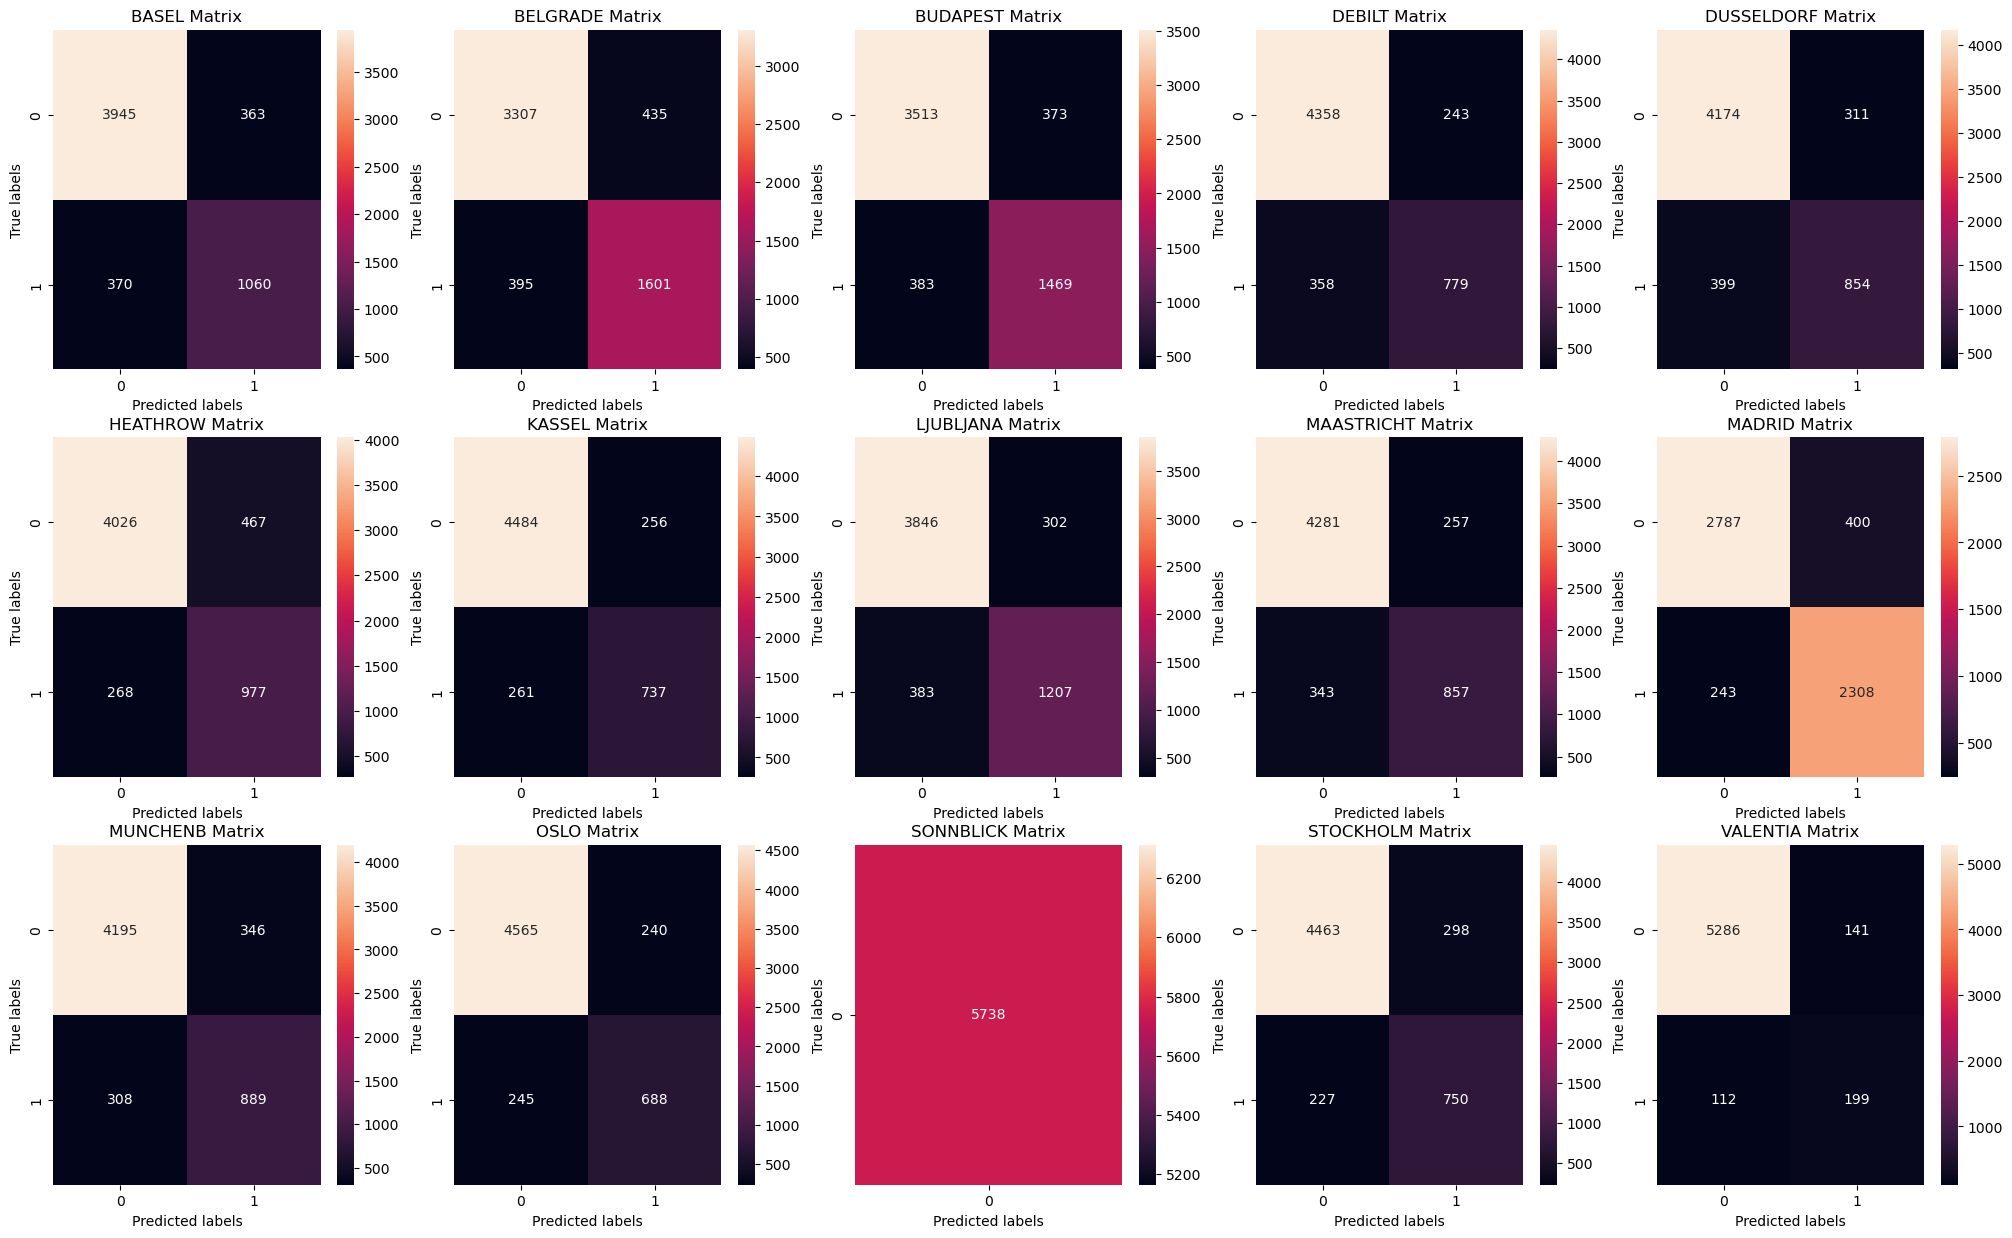

In [25]:
#Confusion matrix  (Testing data model 2)
locations = list({x.split("_")[0] for x in df_filtered.columns if x not in ["MONTH", "DATE"]})
locations.sort()
locations
key = "_pleasant_weather"
stations = []
figure, ax = plt.subplots(3, 5, figsize=(25,15))
labels = ['pleasant', 'unpleasant']   
count=0
for i in range(3):
    for j in range(5):
        name = locations[count]
        cm = confusion_matrix(y_test.loc[:,name+key], y_pred_test[:,count])
        disp = ConfusionMatrixDisplay(confusion_matrix=cm)
        ax[i,j] = sns.heatmap(cm, annot=True, fmt='g', ax=ax[i,j]);
        # labels, title and ticks
        ax[i,j].set_xlabel('Predicted labels');
        ax[i,j].set_ylabel('True labels'); 
        ax[i,j].set_title(name +' Matrix'); 
        #ax[i,j].xaxis.set_ticklabels(labels); #These two lines may throw an error depending on SONNBLICK data. Can you tell why?
        #ax[i,j].yaxis.set_ticklabels(labels);
        count+=1

In [26]:
#Create the ANN Model 3
#hidden_layer_sizes has up to three layers, each with a number of nodes. So (5, 5) is two hidden layers with 5 nodes each,
#and (100, 50, 25) is three hidden layers with 100, 50, and 25 nodes.
mlp = MLPClassifier(hidden_layer_sizes=(600, 300, 200), max_iter=5500, tol=0.0001)
 #Fit the data to the model
mlp.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(600, 300, 200), max_iter=5500)

In [27]:
y_pred = mlp.predict(X_train)
print(accuracy_score(y_pred, y_train))
y_pred_test = mlp.predict(X_test)
print(accuracy_score(y_pred_test, y_test))

0.8340111550081338
0.45939351690484487


#### ANN Model 3 has a training accuracy rate of 85% while the testing rate is 45.6%

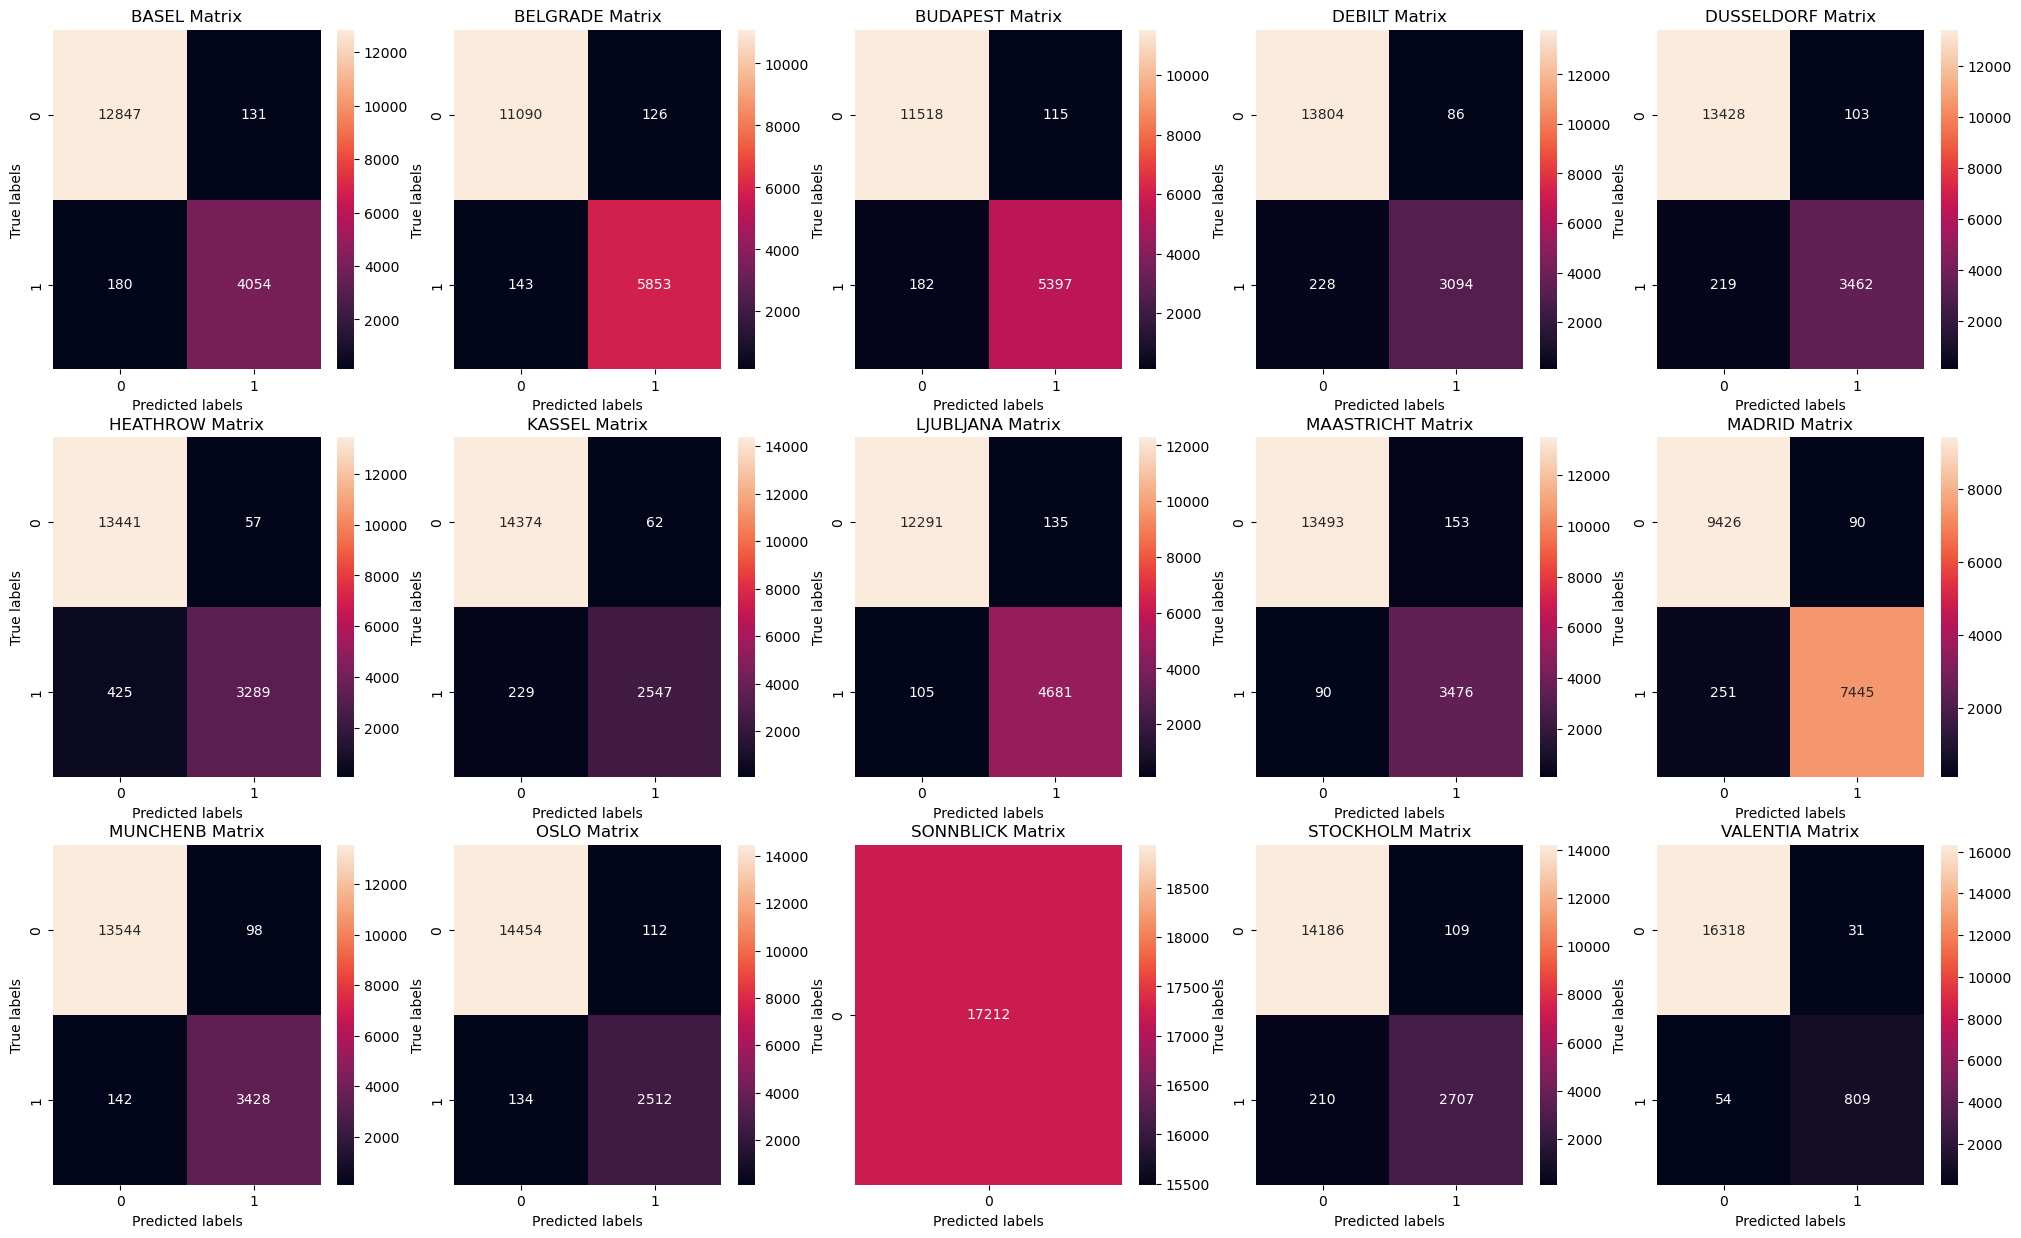

In [29]:
#Confusion matrix  (Training data model 3)
locations = list({x.split("_")[0] for x in df_filtered.columns if x not in ["MONTH", "DATE"]})
locations.sort()
locations
key = "_pleasant_weather"
stations = []
figure, ax = plt.subplots(3, 5, figsize=(25,15))
labels = ['pleasant', 'unpleasant']   
count=0
for i in range(3):
    for j in range(5):
        name = locations[count]
        cm = confusion_matrix(y_train.loc[:,name+key], y_pred[:,count])
        disp = ConfusionMatrixDisplay(confusion_matrix=cm)
        ax[i,j] = sns.heatmap(cm, annot=True, fmt='g', ax=ax[i,j]);
        # labels, title and ticks
        ax[i,j].set_xlabel('Predicted labels');
        ax[i,j].set_ylabel('True labels'); 
        ax[i,j].set_title(name +' Matrix'); 
        #ax[i,j].xaxis.set_ticklabels(labels); #These two lines may throw an error depending on SONNBLICK data. Can you tell why?
        #ax[i,j].yaxis.set_ticklabels(labels);
        count+=1

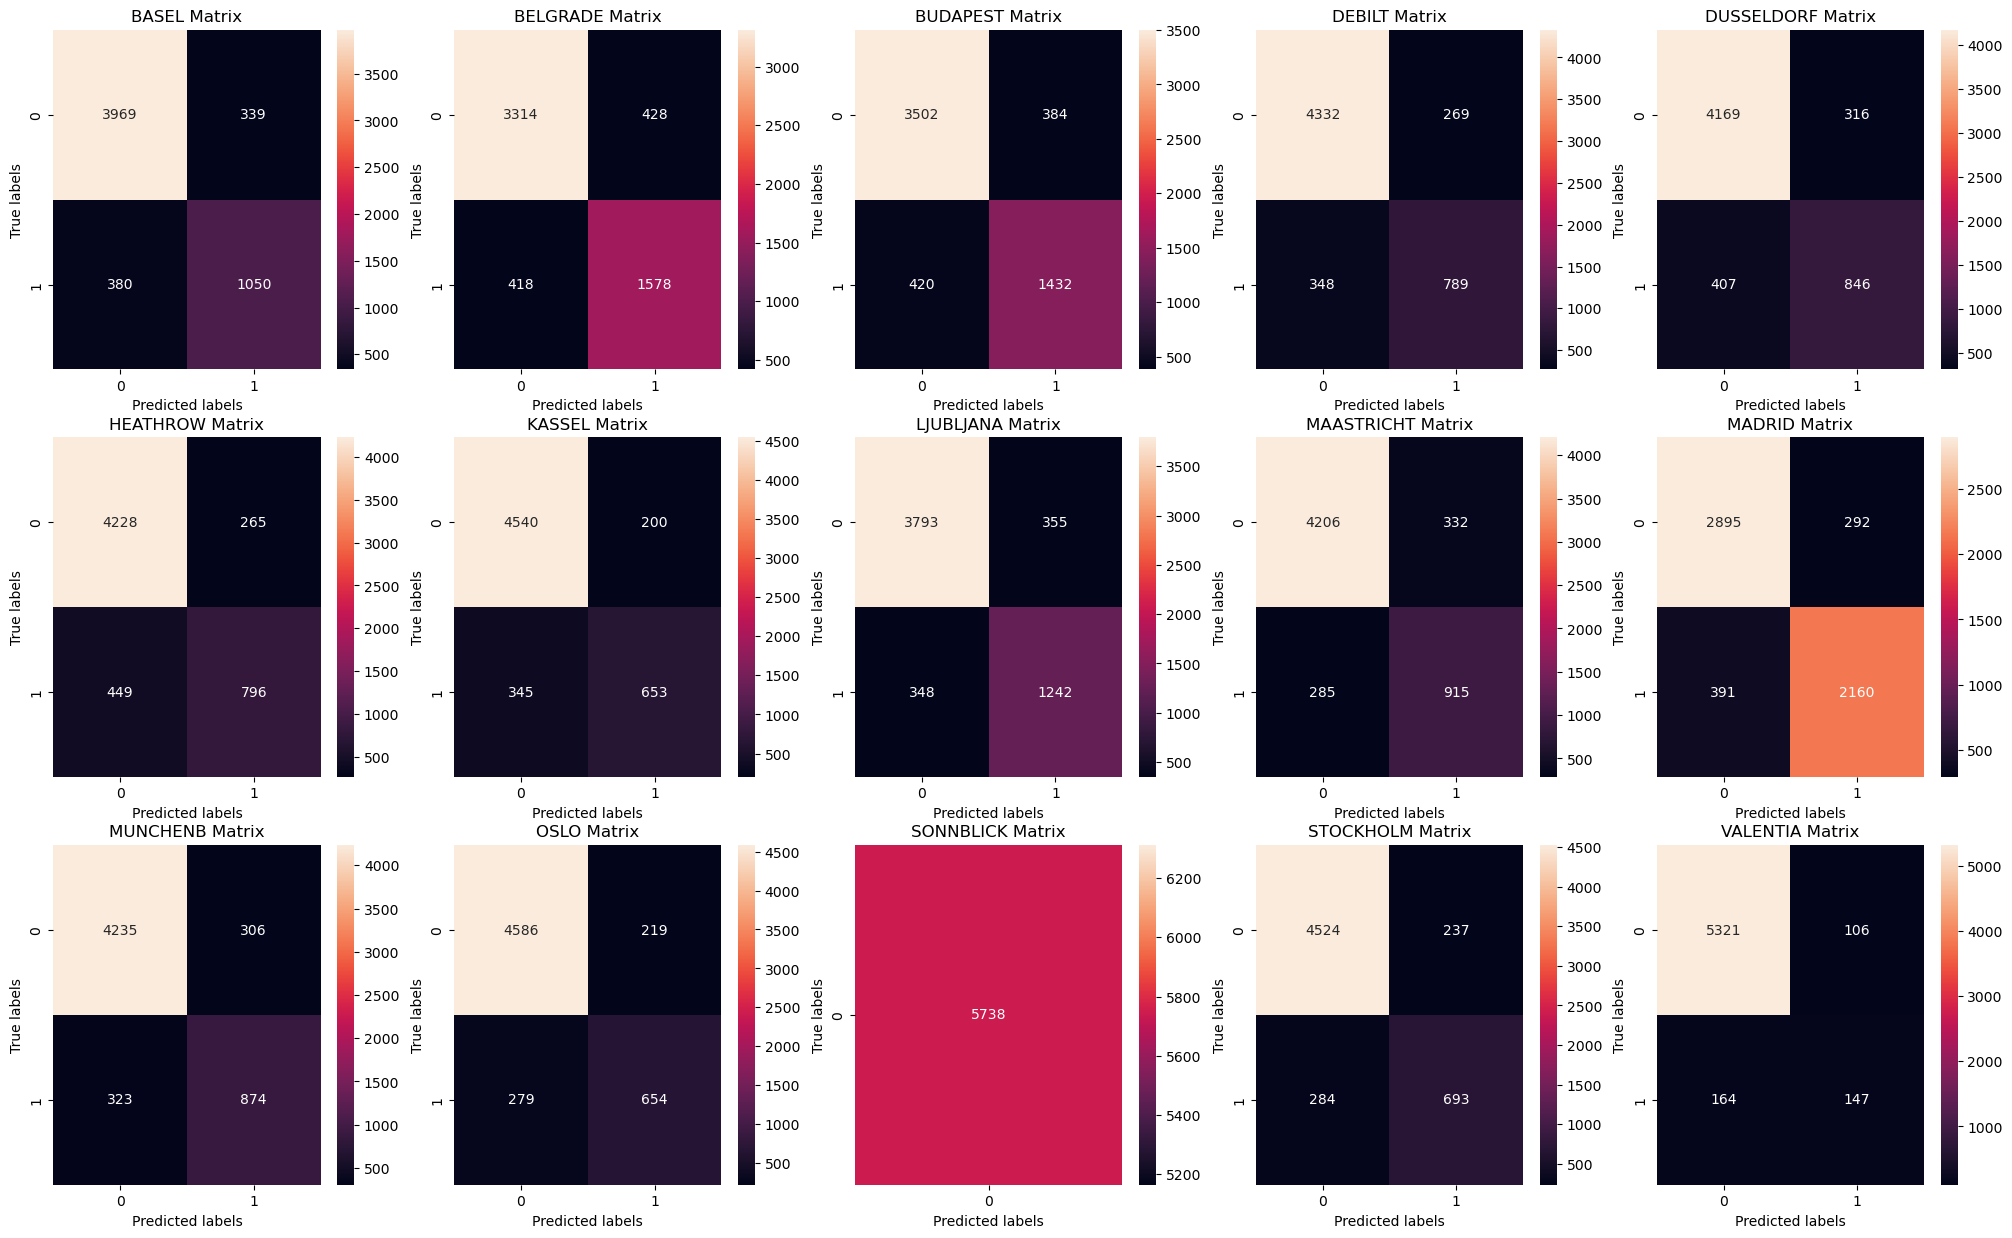

In [30]:
#Confusion matrix  (Testing data model 3)
locations = list({x.split("_")[0] for x in df_filtered.columns if x not in ["MONTH", "DATE"]})
locations.sort()
locations
key = "_pleasant_weather"
stations = []
figure, ax = plt.subplots(3, 5, figsize=(25,15))
labels = ['pleasant', 'unpleasant']   
count=0
for i in range(3):
    for j in range(5):
        name = locations[count]
        cm = confusion_matrix(y_test.loc[:,name+key], y_pred_test[:,count])
        disp = ConfusionMatrixDisplay(confusion_matrix=cm)
        ax[i,j] = sns.heatmap(cm, annot=True, fmt='g', ax=ax[i,j]);
        # labels, title and ticks
        ax[i,j].set_xlabel('Predicted labels');
        ax[i,j].set_ylabel('True labels'); 
        ax[i,j].set_title(name +' Matrix'); 
        #ax[i,j].xaxis.set_ticklabels(labels); #These two lines may throw an error depending on SONNBLICK data. Can you tell why?
        #ax[i,j].yaxis.set_ticklabels(labels);
        count+=1

In [55]:
# Fit your model 
mlp.fit(X_test, y_test)

# Make predictions on the training data
y_pred_test = mlp.predict(X_test)

# Generate the classification report
test_report = classification_report(y_test, y_pred_test)
print(test_report)

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1430
           1       1.00      0.97      0.99      1996
           2       0.98      0.99      0.99      1852
           3       0.99      0.99      0.99      1137
           4       0.99      0.98      0.99      1253
           5       0.99      0.96      0.98      1245
           6       0.99      0.96      0.97       998
           7       1.00      0.98      0.99      1590
           8       0.98      0.99      0.99      1200
           9       0.99      1.00      1.00      2551
          10       0.99      0.99      0.99      1197
          11       0.97      0.98      0.98       933
          12       0.00      0.00      0.00         0
          13       0.99      0.97      0.98       977
          14       1.00      0.90      0.95       311

   micro avg       0.99      0.98      0.99     18670
   macro avg       0.92      0.91      0.92     18670
weighted avg       0.99   

C:\Users\jmiel\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jmiel\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jmiel\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jmiel\anaconda3\Lib\site-packages\sklearn\metrics\_cla

In [57]:
# Fit your model 
mlp.fit(X_train, y_train)

# Make predictions on the training data
y_pred_train = mlp.predict(X_train)

# Generate the classification report
train_report = classification_report(y_train, y_pred_train)
print(train_report)

              precision    recall  f1-score   support

           0       0.91      0.97      0.94      4234
           1       0.98      0.95      0.96      5996
           2       0.95      0.98      0.96      5579
           3       0.96      0.94      0.95      3322
           4       0.95      0.95      0.95      3681
           5       0.96      0.91      0.94      3714
           6       0.94      0.96      0.95      2776
           7       0.92      0.99      0.95      4786
           8       0.95      0.96      0.95      3566
           9       0.97      0.98      0.98      7696
          10       0.92      0.98      0.95      3570
          11       0.89      0.97      0.93      2646
          12       0.00      0.00      0.00         0
          13       0.94      0.92      0.93      2917
          14       0.88      0.96      0.92       863

   micro avg       0.94      0.96      0.95     55346
   macro avg       0.87      0.89      0.88     55346
weighted avg       0.94   

C:\Users\jmiel\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jmiel\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jmiel\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jmiel\anaconda3\Lib\site-packages\sklearn\metrics\_cla